# Task1:
## Email Spam Detection

In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',names=['label','message'],encoding="latin1")

In [3]:
messages.shape

(5572, 2)

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### It is an imbalanced dataset

In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [9]:
messages['length'] = messages['message'].apply(len)
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


## Plotting length of messages

<AxesSubplot: ylabel='Frequency'>

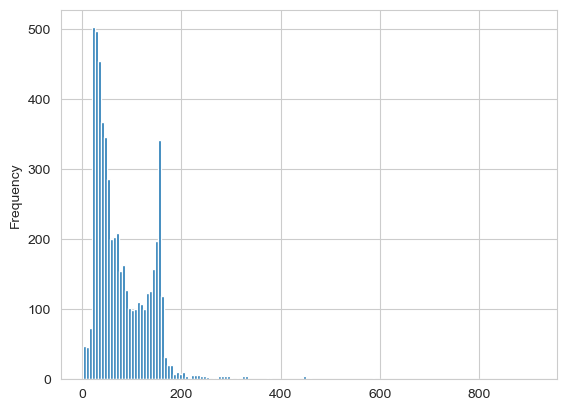

In [10]:
messages['length'].plot.hist(bins=150)

In [11]:
messages.describe()

,length
count,5572.000000
mean,80.490309
std,59.944527
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

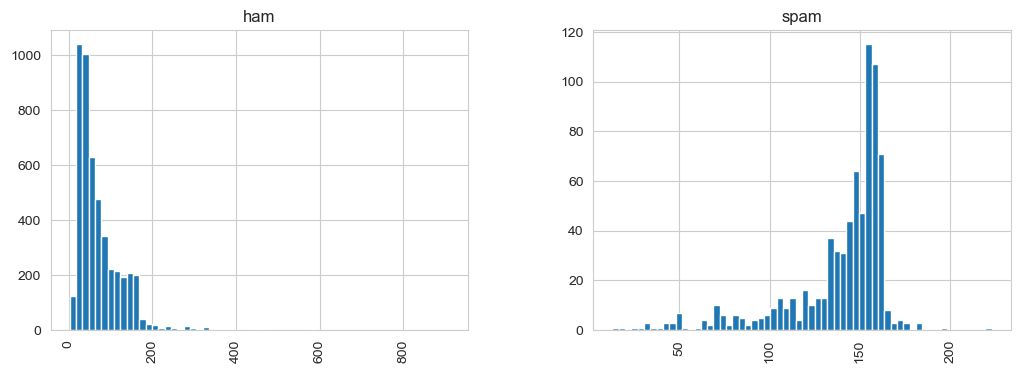

In [12]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
from nltk.corpus import stopwords

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Removing punctuations, stopwords and lowering the messages

In [16]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [18]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Feature extraction and then training using pipeline

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [21]:
message_bow = bow_transformer.transform(messages['message'])

In [22]:
message_bow

<5572x11396 sparse matrix of type '<class 'numpy.int64'>'
	with 50529 stored elements in Compressed Sparse Row format>

In [23]:
message_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [25]:
message_tfidf = tfidf_transformer.transform(message_bow)

In [26]:
message_tfidf

<5572x11396 sparse matrix of type '<class 'numpy.float64'>'
	with 50529 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [28]:
msg_train.shape

(3900,)

In [29]:
msg_test.shape

(1672,)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [31]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(n_estimators=10))
    ])

In [32]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ff749c2f5e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [33]:
predictions = pipeline.predict(msg_test)

In [34]:
predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(label_test,predictions))

[[1434    2]
 [  61  175]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1436
        spam       0.99      0.74      0.85       236

    accuracy                           0.96      1672
   macro avg       0.97      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672



## Predictions

In [37]:
pipeline.predict(['it is a normal day, and i am willing to go office'])

array(['ham'], dtype=object)

In [38]:
pipeline.predict(['Congratulations! You have won a 1 week FREE membership in our $100,000 Prize Jackpot!'])

array(['spam'], dtype=object)